In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import load_model

In [3]:
train_labels = []
train_samples = []

In [4]:
test_labels = []
test_samples = []

## Create their own datas

### Training sets

In [5]:
for i in range(50):
    # The 5% of younger individual who did experience side effect of vaccine
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individual who did not experience side effect of vaccine
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individual who did not experience side effect of vaccine
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individual who did experience side effect of vaccine
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

### Test sets

In [6]:
for i in range(10):
    # The 5% of younger individual who did experience side effect of vaccine
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individual who did not experience side effect of vaccine
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individual who did not experience side effect of vaccice
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individual who did experience side effect of vaccine
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [10]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [11]:
for i in scaled_train_samples:
    print(i)

[0.82758621]
[0.56321839]
[0.13793103]
[0.83908046]
[0.3908046]
[0.32183908]
[0.25287356]
[0.43678161]
[0.49425287]
[0.70114943]
[0.36781609]
[0.62068966]
[0.89655172]
[0.09195402]
[0.37931034]
[0.64367816]
[0.65517241]
[0.03448276]
[0.42528736]
[0.33333333]
[0.87356322]
[0.97701149]
[0.10344828]
[0.87356322]
[0.97701149]
[0.34482759]
[0.44827586]
[0.67816092]
[0.02298851]
[0.62068966]
[0.6091954]
[0.29885057]
[0.36781609]
[0.14942529]
[0.]
[0.34482759]
[0.85057471]
[0.03448276]
[1.]
[0.82758621]
[0.13793103]
[0.57471264]
[0.08045977]
[0.40229885]
[0.18390805]
[0.4137931]
[0.10344828]
[0.86206897]
[0.18390805]
[0.51724138]
[0.89655172]
[0.44827586]
[0.81609195]
[0.42528736]
[0.16091954]
[0.83908046]
[0.97701149]
[0.64367816]
[0.95402299]
[0.06896552]
[0.85057471]
[0.56321839]
[0.10344828]
[0.64367816]
[0.82758621]
[0.88505747]
[0.66666667]
[0.66666667]
[0.42528736]
[0.85057471]
[0.82758621]
[0.49425287]
[0.79310345]
[0.71264368]
[0.32183908]
[0.1954023]
[0.42528736]
[0.74712644]
[0.241

[0.74712644]
[1.]
[0.73563218]
[0.93103448]
[0.65517241]
[0.86206897]
[0.73563218]
[0.67816092]
[0.29885057]
[0.79310345]
[0.67816092]
[0.42528736]
[0.1954023]
[0.13793103]
[0.71264368]
[0.75862069]
[0.35632184]
[0.09195402]
[0.28735632]
[1.]
[0.05747126]
[0.2183908]
[0.57471264]
[0.32183908]
[0.06896552]
[0.6091954]
[0.3908046]
[0.42528736]
[1.]
[0.13793103]
[0.86206897]
[0.90804598]
[0.8045977]
[0.44827586]
[0.68965517]
[0.16091954]
[0.79310345]
[0.67816092]
[0.34482759]
[0.98850575]
[0.71264368]
[0.70114943]
[0.66666667]
[0.33333333]
[0.6091954]
[0.66666667]
[0.54022989]
[0.17241379]
[0.73563218]
[0.11494253]
[0.65517241]
[0.63218391]
[0.33333333]
[0.85057471]
[0.47126437]
[0.98850575]
[0.74712644]
[0.71264368]
[0.72413793]
[0.79310345]
[0.98850575]
[0.5862069]
[0.90804598]
[0.17241379]
[0.98850575]
[0.59770115]
[0.75862069]
[0.64367816]
[0.49425287]
[0.10344828]
[0.81609195]
[0.32183908]
[0.8045977]
[0.6091954]
[0.3908046]
[0.4137931]
[0.83908046]
[0.26436782]
[1.]
[0.06896552]
[0.

[0.96551724]
[0.77011494]
[0.2183908]
[0.6091954]
[0.32183908]
[0.09195402]
[0.75862069]
[0.36781609]
[0.04597701]
[0.57471264]
[0.7816092]
[0.12643678]
[0.63218391]
[0.43678161]
[0.11494253]
[0.35632184]
[0.02298851]
[0.29885057]
[0.82758621]
[0.86206897]
[0.35632184]
[0.]
[0.55172414]
[0.62068966]
[0.70114943]
[0.66666667]
[0.71264368]
[0.4137931]
[0.2183908]
[0.81609195]
[0.93103448]
[0.47126437]
[0.83908046]
[0.97701149]
[0.43678161]
[0.83908046]
[0.47126437]
[0.73563218]
[0.42528736]
[0.03448276]
[0.93103448]
[0.22988506]
[0.28735632]
[0.1954023]
[0.86206897]
[0.56321839]
[0.79310345]
[0.68965517]
[0.24137931]
[0.94252874]
[0.34482759]
[0.26436782]
[0.11494253]
[0.88505747]
[0.25287356]
[0.52873563]
[0.71264368]
[0.81609195]
[0.90804598]
[0.2183908]
[0.27586207]
[0.82758621]
[0.75862069]
[0.3908046]
[0.77011494]
[0.11494253]
[0.97701149]
[0.70114943]
[0.47126437]
[0.59770115]
[0.79310345]
[0.66666667]
[0.26436782]
[0.68965517]
[0.28735632]
[0.63218391]
[0.70114943]
[0.20689655]
[0

## tf.keras Sequential Model

Peut etre définis comme un pile linéaire de couches

In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
model.fit(
    x=scaled_train_samples, 
    y=train_labels,
    validation_split=0.1, 
    batch_size=10, 
    epochs=30, 
    shuffle=True, verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.6359 - accuracy: 0.5635 - val_loss: 0.6159 - val_accuracy: 0.6143
Epoch 2/30
189/189 - 0s - loss: 0.6070 - accuracy: 0.6577 - val_loss: 0.5837 - val_accuracy: 0.7143
Epoch 3/30
189/189 - 0s - loss: 0.5791 - accuracy: 0.7090 - val_loss: 0.5531 - val_accuracy: 0.7476
Epoch 4/30
189/189 - 0s - loss: 0.5513 - accuracy: 0.7534 - val_loss: 0.5224 - val_accuracy: 0.7952
Epoch 5/30
189/189 - 0s - loss: 0.5241 - accuracy: 0.7884 - val_loss: 0.4927 - val_accuracy: 0.8429
Epoch 6/30
189/189 - 0s - loss: 0.4976 - accuracy: 0.8048 - val_loss: 0.4640 - val_accuracy: 0.8762
Epoch 7/30
189/189 - 0s - loss: 0.4720 - accuracy: 0.8354 - val_loss: 0.4359 - val_accuracy: 0.8857
Epoch 8/30
189/189 - 0s - loss: 0.4477 - accuracy: 0.8476 - val_loss: 0.4104 - val_accuracy: 0.8905
Epoch 9/30
189/189 - 0s - loss: 0.4252 - accuracy: 0.8630 - val_loss: 0.3861 - val_accuracy: 0.8952
Epoch 10/30
189/189 - 1s - loss: 0.4043 - accuracy: 0.8741 - val_loss: 0.3639 - val_accuracy: 0.9048

In [16]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [17]:
for i in predictions:
    print(i)

[0.87067 0.12933]
[0.56880474 0.4311953 ]
[0.8983066  0.10169335]
[0.63381755 0.3661825 ]
[0.9398609  0.06013912]
[0.93197423 0.06802578]
[0.02601351 0.9739865 ]
[0.20538944 0.7946105 ]
[0.30796763 0.6920323 ]
[0.60175973 0.39824024]
[0.01940114 0.9805988 ]
[0.01474697 0.98525304]
[0.0234831  0.97651684]
[0.16457178 0.8354282 ]
[0.74874616 0.25125387]
[0.9417153  0.05828473]
[0.16457178 0.8354282 ]
[0.03716489 0.9628352 ]
[0.25326174 0.74673826]
[0.01227451 0.98772544]
[0.9400696  0.05993036]
[0.6647325  0.33526742]
[0.03716489 0.9628352 ]
[0.81748736 0.18251261]
[0.94130784 0.05869212]
[0.10266994 0.89733005]
[0.0327571  0.96724296]
[0.929938   0.07006206]
[0.4338081  0.56619185]
[0.13053335 0.86946666]
[0.72234225 0.2776578 ]
[0.01227451 0.98772544]
[0.81748736 0.18251261]
[0.9398609  0.06013912]
[0.20538944 0.7946105 ]
[0.27979794 0.720202  ]
[0.01940114 0.9805988 ]
[0.94151187 0.05848809]
[0.8852102  0.11478975]
[0.7734267  0.22657324]
[0.2284441 0.7715559]
[0.14673726 0.8532628 ]


In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [19]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
0
1
0
0
1
1
1
0
0
0
1
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0


## Confusion matrix

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.neawis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j], 
            horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted')

In [23]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


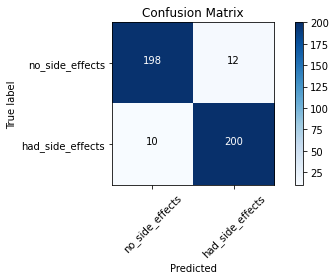

In [24]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title="Confusion Matrix")

## Save the model

In [25]:
import os.path

In [26]:
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [27]:
new_model = load_model('models/medical_trial_model.h5')

In [30]:
new_model.get_weights()

[array([[ 0.18544316, -0.2419914 , -0.2033787 ,  0.5893292 , -0.19098946,
         -0.13719109, -0.24892163, -0.25336182, -0.04388386,  0.3814413 ,
          0.5553925 ,  0.5599852 , -0.58669925,  0.50699747, -0.01269722,
         -0.58402437]], dtype=float32),
 array([-0.07109869,  0.        ,  0.        , -0.14765637,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.1328643 ,
        -0.03269511, -0.13277264,  0.        ,  0.01595032,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.06254384, -0.2531362 ,  0.2843475 ,  0.42927417,  0.5236896 ,
         -0.21713163,  0.1196453 ,  0.04021379,  0.01716303, -0.31302798,
         -0.5390641 , -0.37143022,  0.0877879 ,  0.5643253 , -0.60282284,
          0.04525093,  0.27116495, -0.33892673, -0.45522285,  0.56599844,
         -0.2386031 ,  0.08506833,  0.20699313,  0.48477846,  0.33801714,
          0.27809763, -0.10677901,  0.28579405,  0.300212  ,  0.61121076,
          0.44610974,  0.02838729],
 

In [32]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r